In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

from IPython.display import display

import seaborn as sns
sns.set_theme()

from utils import *

In [2]:
results_orginal = pd.read_csv("../results_gathering/results_table.csv")
results_orginal.head()

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
0,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
1,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
2,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
3,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
4,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt


In [3]:
results_orginal.columns

Index(['pred_text', 'pred_text_len', 'pred_x', 'pred_y', 'pred_x1', 'pred_x2',
       'pred_y1', 'pred_y2', 'pred_width', 'pred_hight', 'text', 'text_len',
       'x', 'y', 'x1', 'x2', 'y1', 'y2', 'width', 'hight', 'detection_status',
       'recogniton_status', 'redable_label', 'iou', 'labels_file_name',
       'detections_file_name', 'recognition_file_name', 'image_name',
       'image_width', 'image_height', 'dataset', 'model', 'weights'],
      dtype='object')

In [4]:
# Remove non readable examples
print(f"Len of results table with all examples: {len(results_orginal)}")
results_orginal = results_orginal[results_orginal.redable_label == True]
print(f"Len of results table without non readable examples: {len(results_orginal)}")

Len of results table with all examples: 38334
Len of results table without non readable examples: 24389


In [5]:
path =  "./instance_count_plots"
kategoria = "Liczba instancji tekstów"

In [6]:
split_column = kategoria

In [7]:
images = results_orginal[results_orginal.text != '-'].groupby("image_name").agg({'dataset': ['first', 'count']})
images.columns = ['dataset', 'text_instance']
images.text_instance /= 4

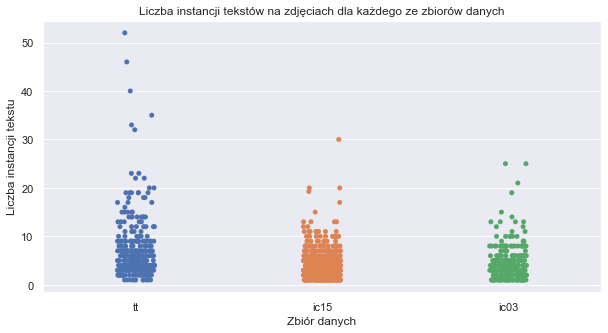

In [8]:
fig, ax = plt.subplots( figsize=(10, 5))
sns.stripplot(data=images, x='dataset', y='text_instance', ax=ax, dodge=True)
ax.set_title("Liczba instancji tekstów na zdjęciach dla każdego ze zbiorów danych")
ax.set_xlabel("Zbiór danych")
ax.set_ylabel("Liczba instancji tekstu")
fig.savefig(f"{path}/liczbainstancji.png")

In [9]:
split_conditions = {
    "0-5": (0, 6),
    "6-10": (6, 11),
    "11-20": (11, 21),
    "20+":(21, np.inf)
}
images_names = {}
for key, value in split_conditions.items():
    imgs = list(images[images.text_instance.between(*value, inclusive="left")].index)
    images_names[key] = imgs    
    print(len(imgs))

782
261
76
14


In [10]:
results_orginal[results_orginal.image_name.isin(imgs)]

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
4640,the,3,[ 99 130 134 104],[483 475 495 502],99,134,475,502,35,27,...,0.719577,gt_img_486.txt,detection_res_img_486.txt,recognition_res_img_486.txt,img_486.jpg,1280,720,ic15,db,tt
4641,tanuki,6,[ 98 153 155 100],[447 440 457 464],98,155,440,464,57,24,...,0.859135,gt_img_486.txt,detection_res_img_486.txt,recognition_res_img_486.txt,img_486.jpg,1280,720,ic15,db,tt
4642,raw,3,[156 190 192 159],[439 434 448 454],156,192,434,454,36,20,...,0.726644,gt_img_486.txt,detection_res_img_486.txt,recognition_res_img_486.txt,img_486.jpg,1280,720,ic15,db,tt
4643,sans,4,[ 94 140 142 97],[410 404 423 429],94,142,404,429,48,25,...,0.775281,gt_img_486.txt,detection_res_img_486.txt,recognition_res_img_486.txt,img_486.jpg,1280,720,ic15,db,tt
4644,sans,4,[150 194 196 153],[402 398 416 421],150,196,398,421,46,23,...,0.754253,gt_img_486.txt,detection_res_img_486.txt,recognition_res_img_486.txt,img_486.jpg,1280,720,ic15,db,tt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38268,-,-,-,-,-,-,-,-,-,-,...,0.000000,-,detection_res_wPICT0004_2.txt,recognition_res_wPICT0004_2.txt,sml_01.08.2002/IMG_1200.JPG,1600,1200,ic03,db,ic15
38269,-,-,-,-,-,-,-,-,-,-,...,0.000000,-,detection_res_wPICT0004_2.txt,recognition_res_wPICT0004_2.txt,sml_01.08.2002/IMG_1200.JPG,1600,1200,ic03,db,ic15
38270,-,-,-,-,-,-,-,-,-,-,...,0.000000,-,detection_res_wPICT0004_2.txt,recognition_res_wPICT0004_2.txt,sml_01.08.2002/IMG_1200.JPG,1600,1200,ic03,db,ic15
38271,-,-,-,-,-,-,-,-,-,-,...,0.000000,-,detection_res_wPICT0004_2.txt,recognition_res_wPICT0004_2.txt,sml_01.08.2002/IMG_1200.JPG,1600,1200,ic03,db,ic15


In [11]:
dfs = []
for key, imgs in images_names.items():
#     imgs = random.sample(imgs, 27)
    df_temp = results_orginal[results_orginal.image_name.isin(imgs)]
    df_temp[split_column] = key
    dfs.append(df_temp)
    print(df_temp.shape)
finaldf = pd.concat(dfs)

(11508, 34)
(8953, 34)
(4864, 34)
(1928, 34)


<ipython-input-11-367552032e27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[split_column] = key


In [12]:
finaldf.image_name.nunique()

1042

In [13]:
finaldf[split_column].value_counts()

0-5      11508
6-10      8953
11-20     4864
20+       1928
Name: Liczba instancji tekstów, dtype: int64

## Detection results analysis

In [14]:
results = finaldf

In [15]:
models_list = list(results.model.unique())
weights_list = list(results.weights.unique())

In [16]:
categories = list(pd.unique(results[split_column]))
# categories.sort()
print(categories)

['0-5', '6-10', '11-20', '20+']


In [17]:
detection_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    detection_metrics[category] = detection_metrics_to_df(df, models_list, weights_list)


In [18]:
for key, value in detection_metrics.items():
    print(key)
    
    display(value)

0-5


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,79.12,69.04,73.74
1,System z modelem db wytrenowany na zbiorze ic15,75.51,74.67,75.09
2,System z modelem textfusenet wytrenowany na zb...,92.53,68.84,78.95
3,System z modelem textfusenet wytrenowany na zb...,89.66,76.74,82.70


6-10


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,83.37,72.55,77.58
1,System z modelem db wytrenowany na zbiorze ic15,80.09,74.79,77.35
2,System z modelem textfusenet wytrenowany na zb...,93.10,61.71,74.22
3,System z modelem textfusenet wytrenowany na zb...,90.28,70.16,78.96


11-20


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,83.08,68.96,75.36
1,System z modelem db wytrenowany na zbiorze ic15,78.03,70.50,74.07
2,System z modelem textfusenet wytrenowany na zb...,89.40,48.07,62.52
3,System z modelem textfusenet wytrenowany na zb...,88.29,55.42,68.10


20+


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,81.60,71.33,76.12
1,System z modelem db wytrenowany na zbiorze ic15,79.90,73.19,76.40
2,System z modelem textfusenet wytrenowany na zb...,85.57,38.69,53.29
3,System z modelem textfusenet wytrenowany na zb...,85.31,48.72,62.02


In [19]:
detection_metrics["0-5"].system.unique()

array(['System z modelem db wytrenowany na zbiorze tt',
       'System z modelem db wytrenowany na zbiorze ic15',
       'System z modelem textfusenet wytrenowany na zbiorze tt',
       'System z modelem textfusenet wytrenowany na zbiorze ic15'],
      dtype=object)

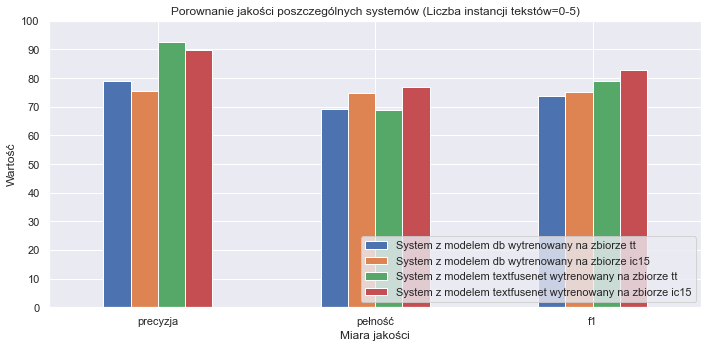

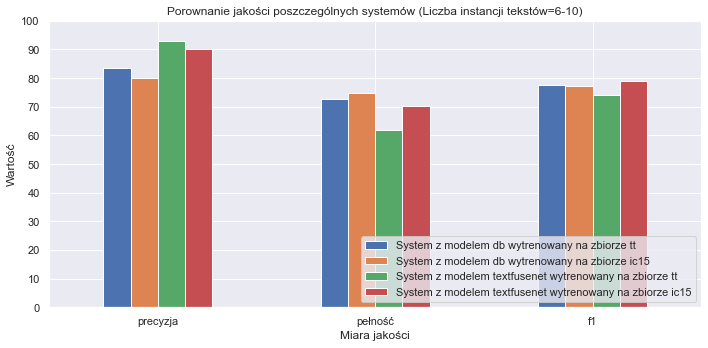

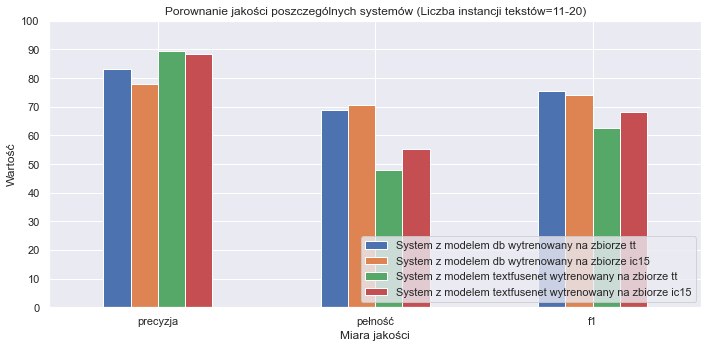

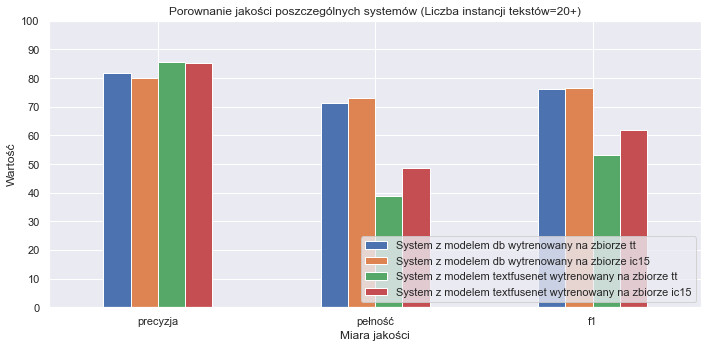

In [20]:
for key, value in detection_metrics.items():
    plot_detection_metrics(value, f"{path}/{key}_detection_metrics.png",
                          title = f"Porownanie jakości poszczególnych systemów ({kategoria}={key})")

## Plot metrics across split category

In [21]:
import seaborn as sns

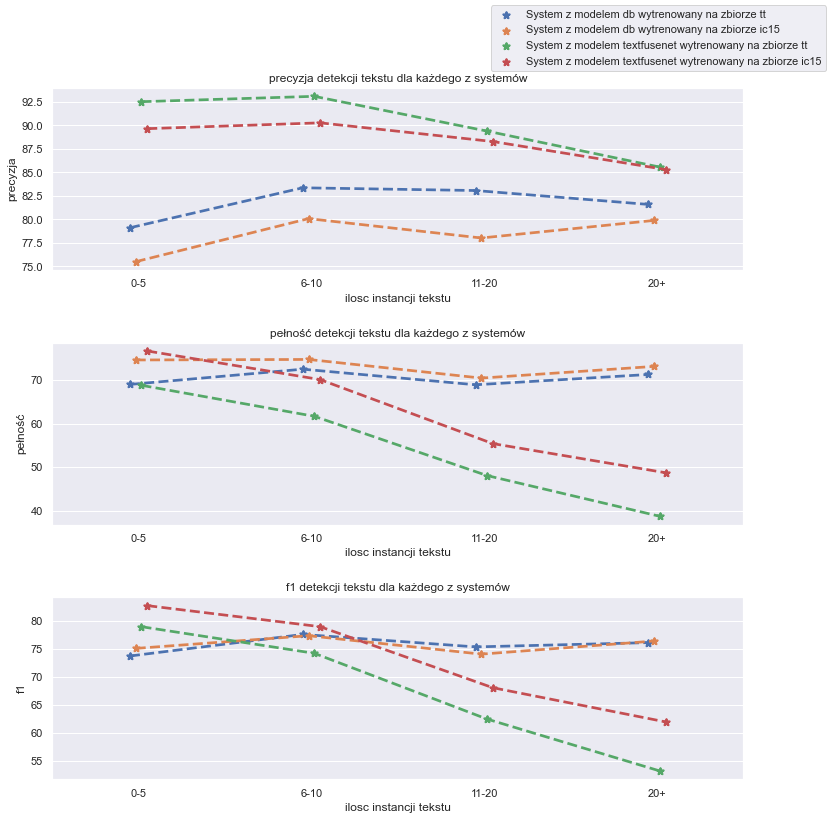

In [22]:
plot_detection_metrics_in_one(detection_metrics, filename=f"{path}/detections_metrics_subplot.jpg", 
                             figsize=(12,12), category='ilosc instancji tekstu')

### plot detections of each system on random image from totaltext dataset

In [23]:
results.dataset.unique()

array(['ic15', 'tt', 'ic03'], dtype=object)

In [24]:
categories

['0-5', '6-10', '11-20', '20+']

20+


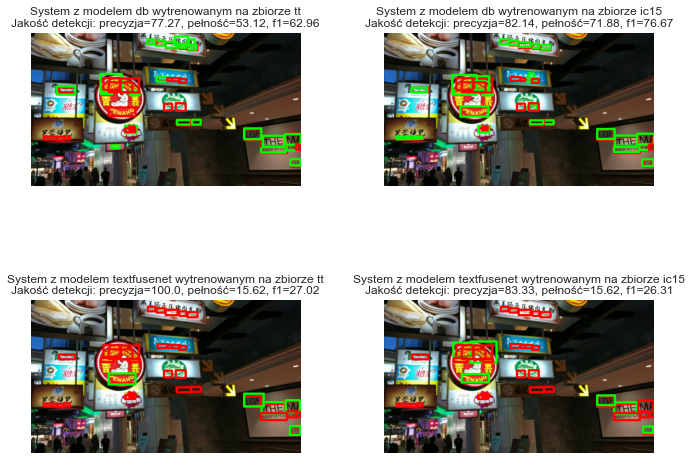

In [25]:
# for category in categories:
category="20+"
print(category)
df = results[results[split_column] == category]
plot_detections(df, models_list, weights_list, filename=f"{path}/{category}_detections.jpg", 
                linewidth=10)

## Recognition results analysis

In [26]:
recognition_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    recognition_metrics[category] = recognition_metrics_to_df(df, models_list, weights_list)

In [27]:
for key, value in recognition_metrics.items():
    print(key)
    
    display(value)

0-5


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,75.85,52.36
1,System z modelem db z wagami ic15,74.16,55.38
2,System z modelem textfusenet z wagami tt,74.68,51.41
3,System z modelem textfusenet z wagami ic15,73.25,56.21


6-10


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,78.89,57.24
1,System z modelem db z wagami ic15,77.19,57.73
2,System z modelem textfusenet z wagami tt,78.40,48.38
3,System z modelem textfusenet z wagami ic15,77.18,54.15


11-20


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,80.16,55.28
1,System z modelem db z wagami ic15,81.36,57.35
2,System z modelem textfusenet z wagami tt,81.45,39.15
3,System z modelem textfusenet z wagami ic15,79.77,44.21


20+


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,87.58,62.47
1,System z modelem db z wagami ic15,87.58,64.10
2,System z modelem textfusenet z wagami tt,89.76,34.73
3,System z modelem textfusenet z wagami ic15,87.08,42.42


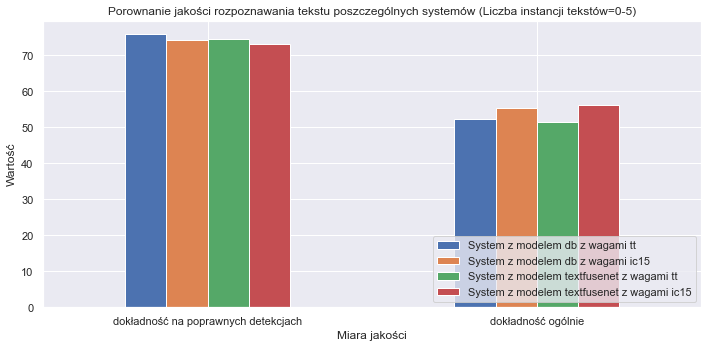

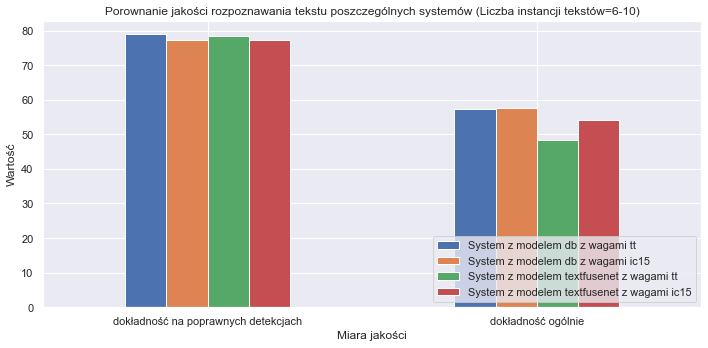

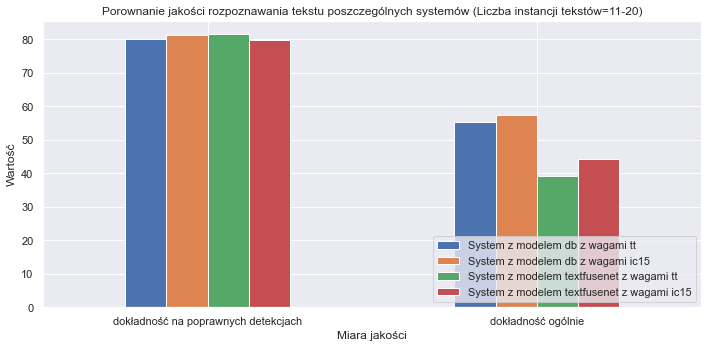

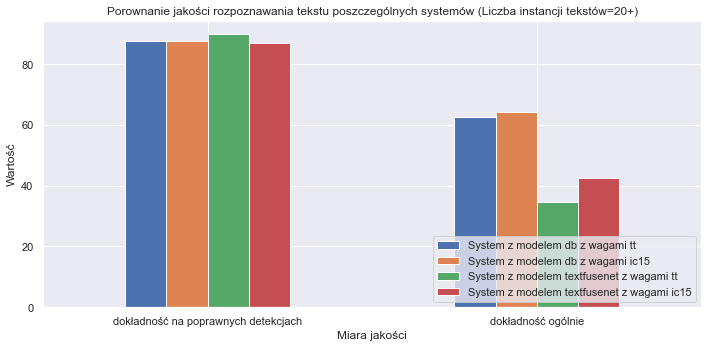

In [28]:
for key, value in recognition_metrics.items():
    print
    plot_recognition_metrics(value, f"{path}/{key}_recognition_metrics.png",
                          title = f"Porownanie jakości rozpoznawania tekstu poszczególnych systemów ({kategoria}={key})")

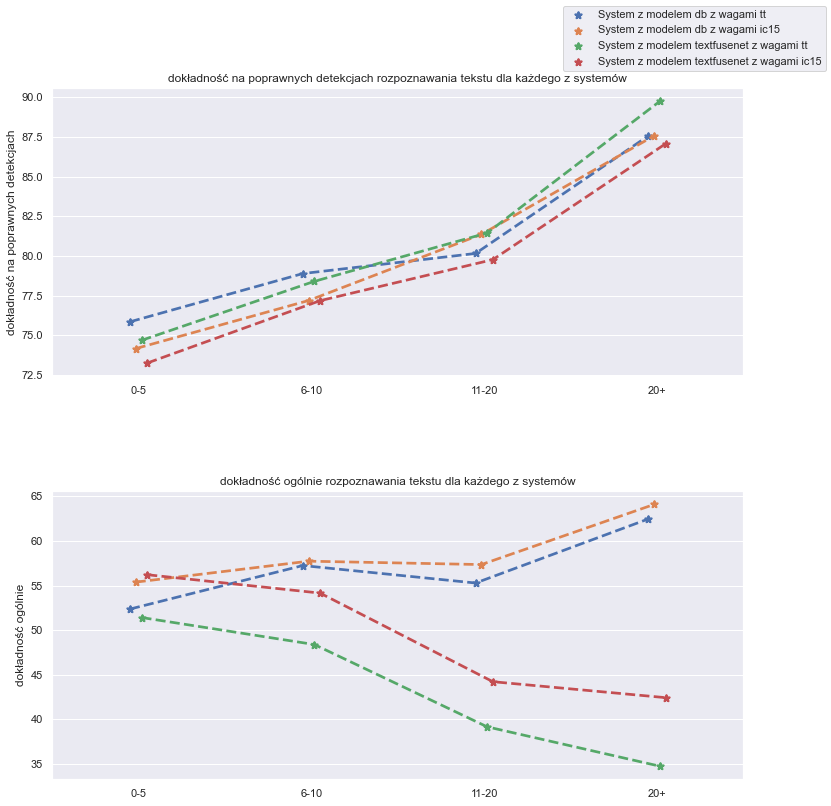

In [29]:
plot_recognition_metrics_in_one(recognition_metrics,
                              filename=f"{path}/recognitions_metrics_subplot.jpg",
                               figsize=(12,12))

In [30]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_iou_histogram(df, models_list, weights_list, filename=f"{path}/{category}_iou_histograms.jpg")

0-5


ValueError: (15, 10) is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

### Recognition example

In [ ]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_recognitions(df, models_list, weights_list, filename=f"{path}/{category}_recognitions.jpg")